In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

<img src="Thompson_Sampling_Slide.png" width=600 align="left">

In [22]:
import random
def get_best_ad(N):
    d = 10
    ads_selected = []
    numbers_of_rewards_1 = [0] * d
    numbers_of_rewards_0 = [0] * d
    total_reward = 0
    #'n' represents the rounds
    for n in range(0, N):
        ad = 0
        #max_random refers to theta, the variable in step 2 and 3 of the algorithm
        max_random = 0
        for i in range(0, d):
            #step 2: take a random draw from the beta distribution
            random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
            #step 3: select the ad with the highest theta
            if random_beta > max_random:
                max_random = random_beta
                #if the case above applies, we should also make the 'ad' to become the index 'i'
                ad = i
        #we update the list 'ads_selected' with that ad, that has the highest theta
        ads_selected.append(ad)
        #the 'reward' picks out the respective values from the dataset (from round 'n' and specific 'ad')
        reward = dataset.values[n, ad]
        if reward == 1:
            numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
        else:
            numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
        total_reward = total_reward + reward
    return ads_selected

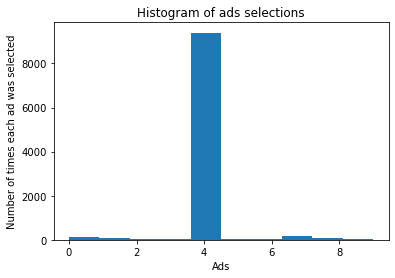

In [23]:
plt.hist(get_best_ad(10000))
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

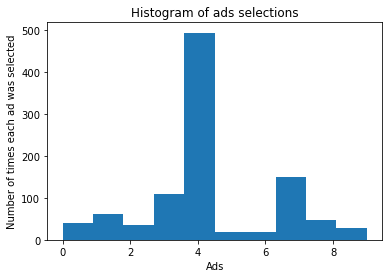

In [24]:
#check if algorithm can already identify best ad after fewer rounds (1000)
plt.hist(get_best_ad(1000))
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

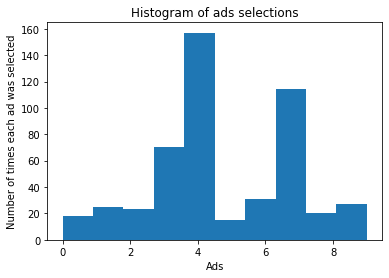

In [25]:
#check if algorithm can already identify best ad after fewer rounds (500)
plt.hist(get_best_ad(500))
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

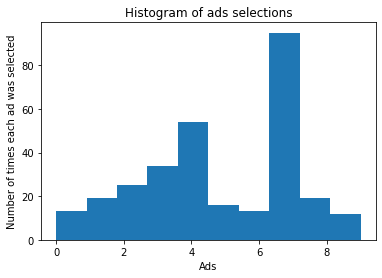

In [26]:
#check if algorithm can already identify best ad after fewer rounds (300)
plt.hist(get_best_ad(300))
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()